**installing the dowhy package and upgrading the networkx package**

In [1]:
pip install --upgrade networkx
pip install dowhy

Note: you may need to restart the kernel to use updated packages.


**Importing the relevant libraries**

In [2]:
import pandas as pd
from dowhy import CausalModel
from IPython.display import Image, display

**Import the BPIC17_incomplete_single_offers.csv from github and inspect the file**

In [3]:
filepath = "https://raw.githubusercontent.com/etioro/DiagnosticProcessMining/main/BPIC17_incomplete_single_offers.csv"
df = pd.read_csv(filepath)
df.info

<bound method DataFrame.info of                       case_id  accepted  first_withdrawal_amount  \
0      Application_1000334415         1                   5000.0   
1      Application_1000339879         1                      0.0   
2       Application_100034150         0                    577.0   
3      Application_1000386745         1                   5000.0   
4      Application_1000610355         0                   3500.0   
...                       ...       ...                      ...   
10075   Application_998359209         1                   5000.0   
10076   Application_998658106         1                   5000.0   
10077   Application_998908852         0                      0.0   
10078   Application_999507989         1                   1000.0   
10079   Application_999993812         1                  30000.0   

       monthly_cost  payback_period  requested_amount  offered_amount  \
0            152.82              36            5000.0            5000   
1    

**Create a causal graph object** 

In [3]:
causal_graph = """
digraph{
accepted;
chased;
credit_score;
first_withdrawal_amount;
monthly_cost;
offer_amt_less_than_requested;
payback_period;
chased -> accepted;
credit_score -> chased;
credit_score -> first_withdrawal_amount;
credit_score -> monthly_cost;
credit_score -> offer_amt_less_than_requested;
credit_score -> payback_period;
first_withdrawal_amount -> accepted;
monthly_cost -> accepted;
offer_amt_less_than_requested -> accepted;
payback_period -> accepted;
}
"""

**Create a causal model object and display it. Achieves same outcome as Daggity** 

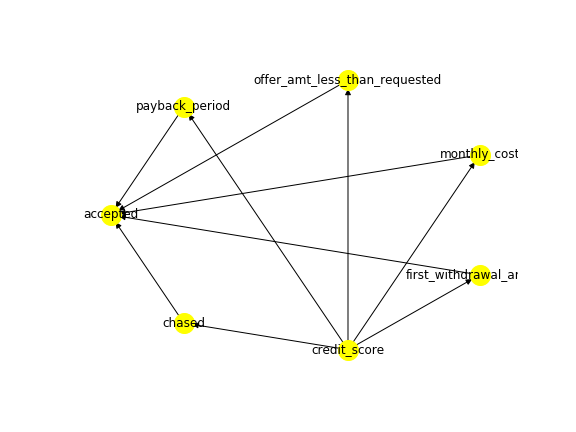

In [9]:
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='chased',
        outcome='accepted')
display(Image(filename="causal_model.png"))

In [10]:
estimands = model.identify_effect()
print(estimands)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                        
─────────(Expectation(accepted|credit_score))
d[chased]                                    
Estimand assumption 1, Unconfoundedness: If U→{chased} and U→accepted then P(accepted|chased,credit_score,U) = P(accepted|chased,credit_score)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



**Estimate the causal effect of chasing on the likelihood of accepting the offer using propensity score weighting** 

In [11]:
#Causal Effect Estimation
estimate = model.estimate_effect(estimands,method_name= "backdoor.propensity_score_weighting")
print(estimate)

propensity_score_weighting
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                        
─────────(Expectation(accepted|credit_score))
d[chased]                                    
Estimand assumption 1, Unconfoundedness: If U→{chased} and U→accepted then P(accepted|chased,credit_score,U) = P(accepted|chased,credit_score)

## Realized estimand
b: accepted~chased+credit_score
Target units: ate

## Estimate
Mean value: -0.032228544676027426



C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Refute the causal estimate using random_common_cause refuter and print the new estimate** 

In [12]:
rcc_refuter = model.refute_estimate(estimands,estimate, "random_common_cause")
print(rcc_refuter)

C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Refute: Add a random common cause
Estimated effect:-0.032228544676027426
New effect:-0.03217544572273052
p value:0.5



C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Refute the causal estimate using unobserved_common_cause refuter and print the new estimate** 

In [13]:
ucc_refuter = model.refute_estimate(estimands,estimate, "add_unobserved_common_cause")
print(ucc_refuter)

Refute: Add an Unobserved Common Cause
Estimated effect:-0.032228544676027426
New effect:-0.03354616801757182



C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Refute the causal estimate using data_subset_refuter and print the new estimate** 

In [14]:
ds_refuter = model.refute_estimate(estimands,estimate, "data_subset_refuter")
print(ds_refuter)

C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Refute: Use a subset of data
Estimated effect:-0.032228544676027426
New effect:-0.030691641938098684
p value:0.46



C:\Users\ogunb\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
